
# Linear Regression Overview and Implementation in Python

## Understanding Linear Regression
Linear regression is a statistical and machine learning method used to model the relationship between a dependent variable and one or more independent variables, assuming a linear relationship between them.

### Basic Concept
- Linear regression models the relationship by fitting a linear equation to the observed data.
- Simplest form in 2D is a straight line: \(y = mx + c\).
  - \(y\): Dependent variable (target).
  - \(x\): Independent variable (predictor).
  - \(m\): Slope of the line.
  - \(c\): Y-intercept.

### Goal
- To find a best-fit line that minimizes the error between observed and predicted values.

## Using Linear Regression in Python
Python's `scikit-learn` and `statsmodels` libraries are commonly used for implementing linear regression.

### Installation

```bash
pip install scikit-learn
or 
pip install statsmodels
```

## **Approach**

* Install Packages
* Import Libraries
* Data Mining/Reading
* Exploratory Data Analysis
* Correlation
* Relationship between variables
* Train - Test Split
* Linear Regression
* Model Summary
* Prediction on Test Data
* Diagnostics and Remedies - in progress
<br>

<img src="../data/LinearRegression.png" alt="Github Logo" width="1200" height="690"/>




In [90]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure
import plotly.express as px

In [91]:
# Load data into dataframe
df = pd.read_csv("../data/LifeExpectancyData.csv")
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [92]:
# Inspect columns
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [93]:
# Get concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [94]:
# Generate quick descriptive statistics of the dataframe
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [95]:
# Identify correlations between variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix= numeric_df.corr()
corr_matrix

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


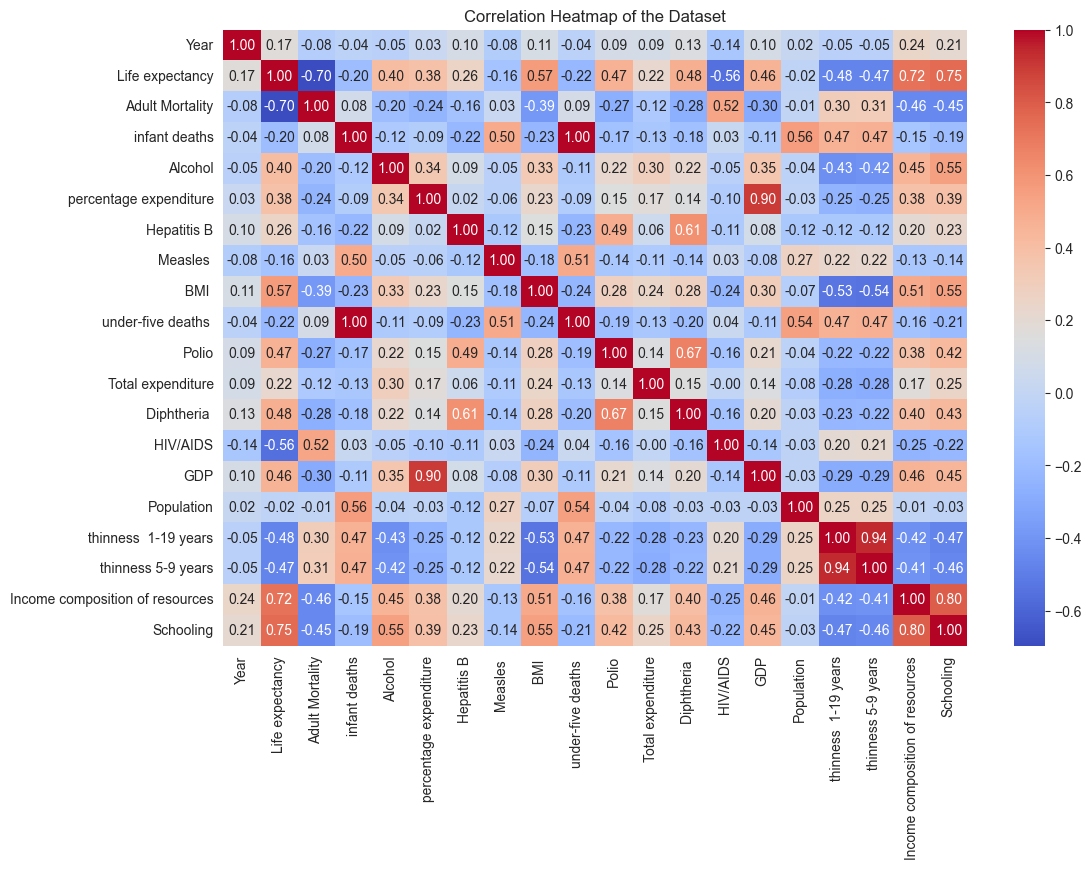

In [96]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of the Dataset')
plt.show()

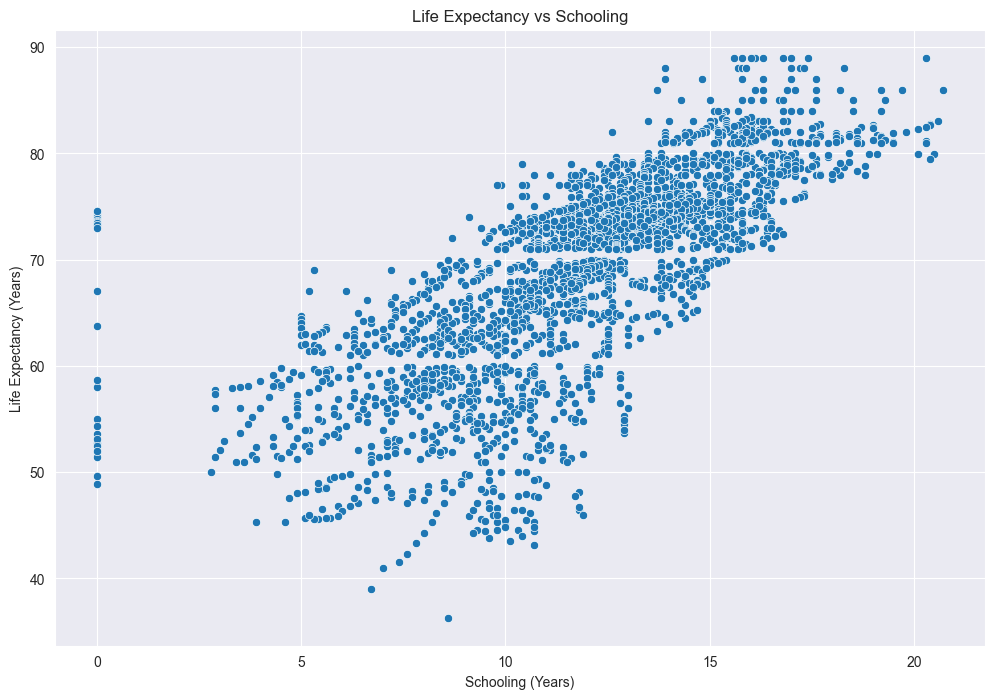

In [97]:
# Aligning the 'Schooling' and 'Life expectancy' columns to have the same number of samples
x_label = 'Schooling'
y_label = 'Life expectancy'

aligned_data = df[[f'{x_label}', f'{y_label}']].dropna()
# Visualize the relationship between Life Expectancy and Schooling
plt.figure(figsize=(12, 8))
sns.scatterplot(x=x_label, y=y_label, data=aligned_data)
plt.title('Life Expectancy vs Schooling')
plt.xlabel('Schooling (Years)')
plt.ylabel('Life Expectancy (Years)')
plt.show()

In [98]:
# Selecting the features and target for the regression
features = aligned_data[f'{x_label}']
target = aligned_data[f'{y_label}']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.75, test_size=0.25, random_state=100
)

# Adding a constant to the model (for the intercept)
X_train_sm = sm.add_constant(X_train)

# Creating and fitting the model
model = sm.OLS(y_train, X_train_sm).fit()

# Getting the summary of the regression results
model_summary = model.summary()
import matplotlib.pyplot as plt
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     2716.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        21:01:34   Log-Likelihood:                -6725.6
No. Observations:                2076   AIC:                         1.346e+04
Df Residuals:                    2074   BIC:                         1.347e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2806      0.500     88.498      0.0

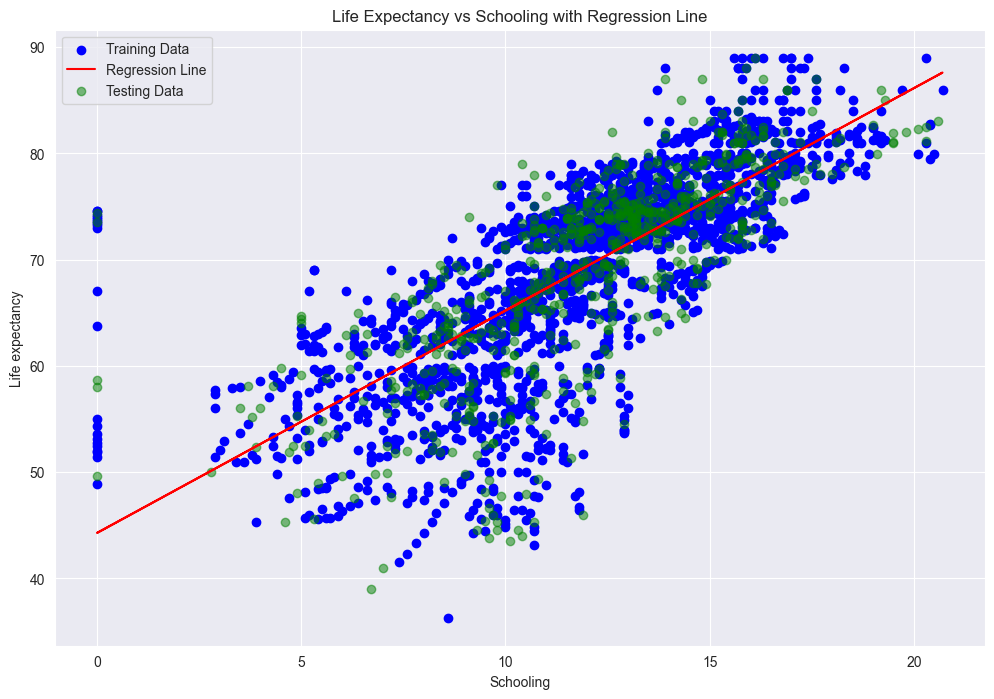

In [99]:
# Plotting the training data
plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, color='blue', label='Training Data')

# Calculating the regression line
intercept, slope = model.params
line = intercept + slope * X_train

# Plotting the regression line
plt.plot(X_train, line, color='red', label='Regression Line')

# Optionally, plot the testing data
plt.scatter(X_test, y_test, color='green', alpha=0.5, label='Testing Data')

# Adding labels and title
plt.xlabel(f'{x_label}')
plt.ylabel(f'{y_label}')
plt.title('Life Expectancy vs Schooling with Regression Line')
plt.legend()

# Show the plot
plt.show()

### Content of OLS Regression Summary
- Model Information: This includes the type of regression model used (in this case, OLS - Ordinary Least Squares), and sometimes the date and time the model was run.
- Dependent Variable: The variable you're trying to predict (Life expectancy in your case).
- Model Coefficients:
    - Intercept (const): The Y-intercept of the regression line, representing the expected value of the dependent variable when all predictors are zero.
    - Slope Coefficients: For each predictor variable (Schooling), this indicates the expected change in the dependent variable for a one-unit change in the predictor, holding all other predictors constant.
- P-values and Hypothesis Testing: Associated with each coefficient, indicating whether the coefficients are statistically significantly different from zero.
- R-squared: A statistical measure that represents the proportion of the variance for the dependent variable that's explained by the independent variables.
- Adjusted R-squared: Similar to R-squared but adjusts for the number of predictors in the model.
- F-statistic: A measure of the overall significance of the model.
- Log-Likelihood: A measure of the model's goodness of fit.
- AIC and BIC: Akaike Information Criterion and Bayesian Information Criterion, respectively, for model selection purposes.
- Confidence Intervals: For each coefficient, showing the range within which the true population parameter will fall, with a certain level of confidence.

### Interpretation of regression results
- Dependent Variable: Life expectancy
- R-squared: 0.567
    - This value indicates that approximately 56.7% of the variance in life expectancy can be explained by the model.
- Adjusted R-squared: 0.567
    - This is a more accurate measure as it adjusts for the number of predictors in the model.
- Coefficients:
    - Constant (Intercept): 44.2806
    - Schooling: 2.0928
        - This coefficient suggests that for each additional year of schooling, life expectancy increases by about 2.09 years, all else being equal.
- F-statistic: 2716
    - This indicates the overall significance of the model.
- Prob (F-statistic): 0.00
    - This value being close to 0 suggests that the model is statistically significant.
- No. Observations: 2076
    - The number of observations used in the model.
The analysis shows a significant positive relationship between schooling and life expectancy, as indicated by the coefficient of the schooling variable and the overall model significance.

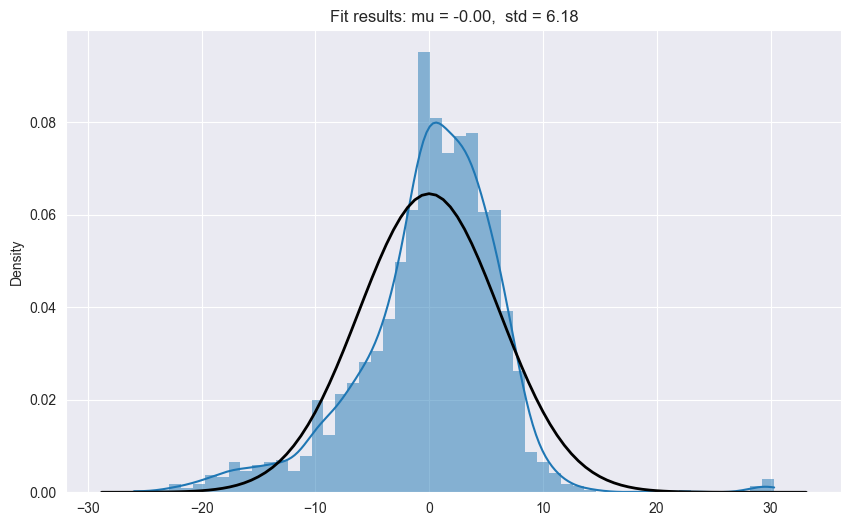

In [100]:
# Getting the residuals
residuals = model.resid

# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, stat="density", linewidth=0)

# Plotting the theoretical normal distribution for comparison
mean_resid, std_resid = np.mean(residuals), np.std(residuals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - mean_resid) / std_resid)**2) / (std_resid * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2)

title = "Fit results: mu = %.2f,  std = %.2f" % (mean_resid, std_resid)
plt.title(title)

# Show the plot
plt.show()

### Analyzing the Plot:
- Mean (μ): The mean of the residuals is very close to 0, which suggests that on average, the model predictions are accurate.
- Standard Deviation (σ): The standard deviation is 6.18. This value quantifies the typical distance of the residuals from the mean.
- Identifying Outliers:
    - Within ±1σ: Most of the data points (residuals) are expected to fall within one standard deviation from the mean (from -6.18 to +6.18 in your case).
    - Within ±2σ: About 95% of the data points should fall within two standard deviations (from -12.36 to +12.36).
    - Beyond ±2σ: Points lying beyond this range are potential outliers. These are residuals where the prediction error is unusually large.
- Interpretation:
    - The tails of the histogram (the bars that extend beyond the bell curve) represent residuals that are notably distant from the mean. These tails show potential outliers, especially the points on the far left and far right of the distribution.
    - Far Left: The points far to the left (e.g., less than -12.36) represent cases where the model's predictions were significantly higher than the actual values.
    - Far Right: Conversely, points to the far right (greater than +12.36) indicate predictions that were significantly lower than the actual values.
- Considerations:
    - Skewness: The histogram is skewed to one side, it may indicate systematic bias in the model predictions.

### the summary of the results from the linear regression model using scikit-learn:
- Coefficients:2.0928
    - This coefficient suggests that for each additional year of schooling, life expectancy increases by about 2.09 years, assuming all other factors remain constant.
- Intercept: 44.2806
    - This is the value of life expectancy when the schooling years are zero.
- Mean Squared Error (MSE): 37.8163
    - This value represents the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value.
- Coefficient of Determination (R²): 0.5606
    - This value indicates that approximately 56.06% of the variance in life expectancy can be explained by the model.
- These results are consistent with the analysis conducted using Statsmodels, indicating a significant positive relationship between schooling and life expectancy.

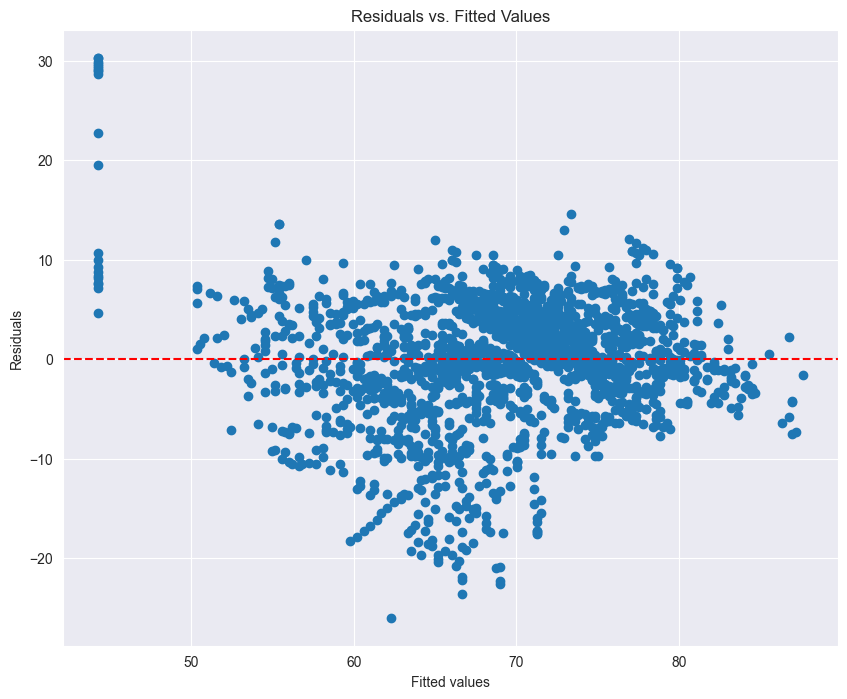

In [101]:
# Predict on the training data
fitted_values = model.predict(X_train_sm)

# Plot the residuals vs fitted values
plt.figure(figsize=(10, 8))
plt.scatter(fitted_values, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

### Residuals vs. Fitted Values Plot
In a well-fitting linear regression model, the residuals vs. fitted values plot would show a random scatter of points around the horizontal line at zero, without any discernible pattern.

- Randomness: There is no clear pattern, which is good as it suggests that a linear model might be appropriate for the data.
- Outliers: There are several points that have high residuals far from the zero line. These might be outliers or influential points that could be affecting the fit of the model.
- Equal Variance (Homoscedasticity): The spread of residuals appears to be fairly constant across the range of fitted values, although there might be a slight increase in variability for higher fitted values.

<Figure size 1000x800 with 0 Axes>

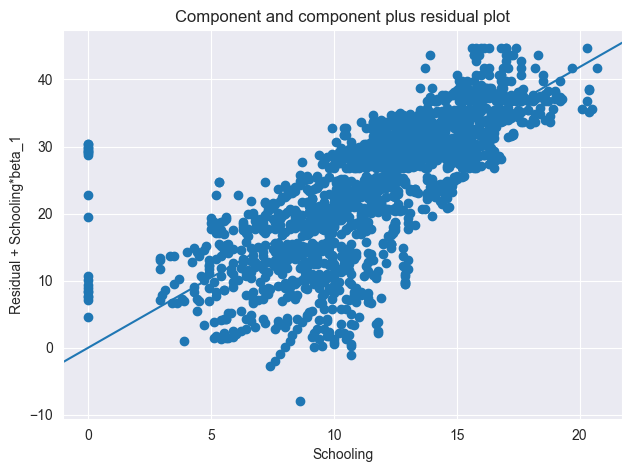

In [104]:
plt.figure(figsize=(10, 8))
fig = sm.graphics.plot_ccpr(model, f'{x_label}')
fig.tight_layout(pad=1.0)

### Component and Component Plus Residual (CCPR) Plot
The CCPR plot provides a way to judge the effect of the 'Schooling' predictor on the response variable while taking into account the effects of the other independent variables.

- Linear Relationship: The relationship appears to be somewhat linear, but with curvature, especially at the lower and higher values of schooling. This suggests a possible non-linear relationship.
- Spread: There is an increasing spread in residuals as 'Schooling' increases, which could indicate heteroscedasticity, meaning the variance of the residuals is not constant across all levels of schooling.

### Assessment
Non-Linearity: Both plots suggest that while there might be a general linear trend, there are signs of non-linearity, especially at the extremes of the 'Schooling' variable.